# Calculate frictional slopes (part 1): understanding shear fractures

Copyright 2022 Marco A. Lopez-Sanchez.  
Content under [Creative Commons Attribution license CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/), code under [Mozilla Public License 2.0](https://www.mozilla.org/en-US/MPL/2.0/).

> **Goals**: Understand the basics of shear fractures in the brittle field. The Coulomb failure criterion, Byerlees's and Amonton's laws will be introduced.

In [1]:
# import the required Python scientific libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set a custom figure style (optional, you can comment on this whole block)
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'white'

## Step 1: Sliding on a dry fracture: the Amontons and Coulomb laws

On the Earth, fault slip and earthquakes occur when the tectonic plate forces exceed the fault resistance which is directly linked to the fault [friction](https://en.wikipedia.org/wiki/Friction). In this notebook, we will introduce how this phenomenon was studied experimentally, what basic models exist and how successful these models are in explaining what we observe in nature.

### Amontons' law of friction

The first attempt to determine which tangential shearing force is needed to displace two bodies in contact over an approximately planar surface was that of [Amontons](https://en.wikipedia.org/wiki/Guillaume_Amontons) in the 17th century (Amontons, 1699). Amontons established two principles:
- the tangential shearing force is independent on the contact area (first Amontons law of friction). 
- It is proportional to the normal load pressing the surfaces together (second Amontons law of friction).

The second law of friction is expressed as follows

$$\tau = \mu \sigma_n \quad (1)$$

where $\tau$ is the **fracture shear strength** or _critical shear stress_, $\sigma_n$ is the **fracture-normal stress** and $\mu$ the so-called **internal coefficient of friction** that relates both.

> 👉 The _coefficient of friction_ in the Amonton's equation can be referred to as the _coefficient of static friction_, when it refers to the condition required to initiate sliding or the _coefficient of dynamic friction_ when it refers to the shear stress necessary for maintaining the frictional sliding at a constant velocity; which is always less than that required to initiate sliding ($\mu_d < \mu_s$) (e.g. Jaeger et al. 2007).

![](https://raw.githubusercontent.com/marcoalopez/strength_envelopes/master/figures/Free_body.png)   
_Figure 1. Two main factors at play in terms of friction using the simile of a block on an inclined plane: the _fracture-normal stress_ ($\sigma_n = mg cos\theta$) and the _fracture shear stress_ ($\sigma_s = mg sin\theta$). The _fracture shear strength_ ($\tau$) would have to satisfy that $\tau \leq \mu \cdot mg cos\theta$ for the block (or the fault) to remain still._

### Coulomb's law

Brittle failure is often described with the _Coulomb criterion_ (Coulomb 1773) that proposed the following relation

$$\tau = C_0 + \mu \sigma_n \quad (2)$$

where $C_0$ is the **cohesion of the fracture surface** (or the _frictional cohesive strength_) that accounts for the resistance of the fracture plane to start sliding. Coulomb also found that the _fracture shear strength_ is roughly independent of the velocity of sliding, which is known as the (Coulomb) third law of friction.

### Relations between the fracture plane orientation and the principal stresses, and the internal angle of friction

The normal and shear stress along a fracture depends on the orientation of the principal stresses with respect to the fracture. For example, in figure 1 both values change with the slope of the plane. Figure 2 illustrates the different angular relationships between a shear fracture plane and the principal stress vectors in 2D.

![](https://raw.githubusercontent.com/marcoalopez/strength_envelopes/master/figures/ang_relations.png)  
[TODO → add figure 2 here!]()  
_Figure 2. Angular relationships between a shear fracture plane and the principal stress vectors in 2D where $\theta$ and $\alpha$ are the angle between the principal stress $\sigma_1$ and the normal to the fracture plane and the fracture plane, respectively_

Using the figure above and trigonometric relationships we can estimate the normal and shear stresses acting along any fracture plane using the following relations (e.g. Twiss and Moores, 2007):

$$\sigma_n = \frac{\sigma_1+\sigma_3}{2}+\frac{\sigma_1-\sigma_3}{2}cos2\theta \quad (3)$$ 

$$\sigma_s = \frac{\sigma_1-\sigma_3}{2}sin2\theta \quad (4)$$


Theoretically, faulting (or a shear fracture) should occur along the plane that maximizes the Amonton's and Coulomb's stress $\tau$ that takes into account both the normal and shear stresses acting on the fracture plane. To visualise this, let's illustrate how normal and shear stresses vary according to the angle between the fracture and the principal stresses using equations $1.2$ and $1.3$. We will assume principal stresses of 1500 ($\sigma_1$) and 500 ($\sigma_2 = \sigma_3$) MPa, respectively. Let's put this into code. 

In [2]:
# estimate the whole range of (theta) angles between 0 and 90
angles = np.arange(start=0, stop=91)

# set the stress field (i.e. the magnitude of principal stresses in MPa)
sigma1, sigma2, sigma3 = 1500, 500, 500

# estimate normal and shear stresses (angles are converted to radians)
sigma_n = (sigma1 + sigma3) / 2 + ((sigma1 - sigma3) / 2) * np.cos(2 * np.deg2rad(angles))
sigma_s = ((sigma1 - sigma3) / 2) * np.sin(2 * np.deg2rad(angles))

# estimate the ratio between shear and normal stress (i.e. the coefficient of friction)
sigma_ratio = sigma_s / sigma_n
maximum = sigma_ratio[np.argmax(sigma_ratio)]  # numpy argmax returns the index of the maximum value

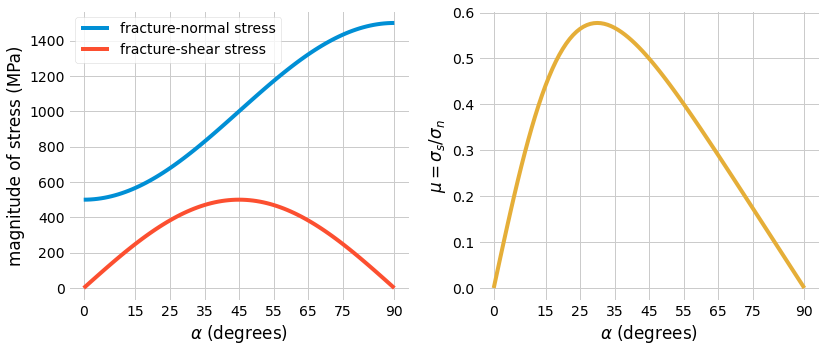

In [3]:
# make the plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# axe 1: magnitude of normal and shear stress
ax1.plot(90 - angles, sigma_n, label='fracture-normal stress')
ax1.plot(90 - angles, sigma_s, label='fracture-shear stress')

ax1.set(xlabel=r'$\alpha$ (degrees)', ylabel='magnitude of stress (MPa)')
ax1.set_xticks([0, 15, 25, 35, 45, 55, 65, 75, 90])
ax1.legend(loc='best', fontsize=14)

# axe 2: coefficent of friction
ax2.plot(90 - angles, sigma_ratio, color='C2', label='$\sigma_s / \sigma_n$')
ax2.set_xticks([0, 15, 25, 35, 45, 55, 65, 75, 90])
_ = ax2.set(xlabel=r'$\alpha$ (degrees)', ylabel='$\mu = \sigma_s / \sigma_n$')

_Figure 3. The magnitude of normal and shear stress (left) and coefficient of friction (right) as a function of the fracture plane orientation ($\alpha$) respect to the principal stress $\sigma_1$._

Figure 3 shows that the maximum resolved _shear stress_ on a fracture plane (in red) is obtained when the plane is oriented 45 degrees to the maximum principal stress, being the magnitude half as large as the applied differential stress (i.e. $\sigma_d/2 = 500$ MPa), and becoming zero at the extremes (angles 0 and 90). In practice, most rocks deformed in confined compression in the brittle field develop shear fractures with planes oriented less than 45 degrees from maximum compressive stress, so let's see what's happening here.

The normal-fault stress $\sigma_n$, in blue, peaks when the fracture plane is arranged perpendicular to the maximum stress, here $\sigma_n =\sigma_1 = 1500$ MPa, and minimum when the fracture plane is parallel to the maximum stress, in this case by matching the minimum principal stress value $\sigma_n =\sigma_3 = 500$ MPa. So, as opposed to the shear stress, it is not arranged symmetrically around 45 degrees from maximum compressive stress. For example, it is easy to visualise that the fracture-normal stress at 45 degrees is higher than for smaller angles. Given that this two stresses trade-off against each other, we need to find which ($\alpha$) angle maximises this relationship (i.e. the internal coefficient of friction). This is illustrated precisely on the right-hand side of Figure 3 where it is observed that the ratio between the fracture-shear and fracture-normal is maximised for a value between 25 and 35 degrees. Let's estimate the exact angle and value.

In [4]:
# estimate the angle of friction for which the ratio is maximum
critical_angle = 90 - angles[np.argmax(sigma_ratio)]

print(f'In our example, a maximum ratio of {maximum:.2f} between the shear and ' +
      f'the normal stress is given at an angle of {critical_angle} degrees.')

In our example, a maximum ratio of 0.58 between the shear and the normal stress is given at an angle of 30 degrees.


#### The internal angle of friction

TODO

...using the so-called **internal angle of friction** $\phi$ (e.g. Mohr, 1900).

TODO → figure 4 (Mohr space)

## Step 2: Byerlee empirical relation

Based on a large number of laboratory measures, Byerlee (1978) determined the _coefficient of friction_ ($\mu$) and the _cohesive strength_ $C_0$ for a broad range of rock types. He found that the value of $\mu$ is independent temperature, rate of deformation and, largely, rock type; being some notable exceptions clay-rich rocks such as slates or serpentinites. Byerlee provided two empirical expressions depending on confining pressure often referred to as _Byerlee's Law_

for confining pressures 5 < σ < 200 MPa (where 200 MPa is roughly ~7 km depth in the continental crust)  
$\tau = 0.85 \sigma$  

for 200 < σ < 1700 MPa  
$\tau = 50 + 0.6 \sigma$

The single best-fit line for the whole Byerlee dataset over the pressure range yield an average μ of 0.73 ([Rutter and Glover, 2012](https://doi.org/10.1016/j.jsg.2012.08.014))

TODO

> **Take home messages**
>- Amontons and Coulomb's laws indicate that the _fracture shear strength_ increases linearly with fracture-normal stress. As fracture-normal stress increases with confining pressure, brittle failure becomes difficult with depth.
>- According to Amontons, Coulomb and Byerlee, the _coefficient of friction_ is largely independent of temperature, rate of deformation, and rock type. The latter explains why a brittle fault can cut across different lithologies with no change in angle.
>- Although somewhat counterintuitive, the cohesive strength of the rocks in the upper crust is negligible as they are preexisting fracture planes everywhere. There is strong evidence on this from studies measuring the stress state along superdeep boreholes (e.g. [Emmermann and Lauterjung, 1997](https://doi.org/10.1029/96JB03945)). The parameter $C_0$ in Coulomb's is therefore used to account for the _frictional cohesive strength_ or just taken as zero.
>- All models presented here are valid for _shear fractures_ not for _extensional fractures_ (the latter are better explained by the [Griffith theory of fracture](https://en.wikipedia.org/wiki/Fracture_mechanics) not covered here).
>
>_**Aside note**: keep in mind that the Coulomb and Amontons' laws are not flow laws (i.e. do not relate stress and strain or strain rate) but a model that describes the critical state at which brittle failure occurs within the brittle field_.

In [5]:
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook tested in {today} using:')
print('Python', sys.version)
print('Numpy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Pandas', pd.__version__)

Notebook tested in 2022-08-22 using:
Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy 1.23.1
Matplotlib 3.5.1
Pandas 1.4.3
